<a href="https://colab.research.google.com/github/Saahil3/ML-Lab-Experiments/blob/main/ML_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sahil Churi
Rollno.: 21102B0049
BE CMPN B

---
Experiment 2 : Demonstrating Logistic Regression For Binary Classification

---
Github : https://github.com/Saahil3/ML-Lab-Experiments

---
Dataset: https://www.kaggle.com/competitions/titanic/data


In [59]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")



In [60]:
df_train = pd.read_csv('/train.csv')
df_test = pd.read_csv('/test (1).csv')

In [61]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [62]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
train = df_train.copy()

###  Visualization

In [64]:
decode_map = {0: "Not Survived", 1: "Survived"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['Survived'] = train['Survived'].apply(lambda x: decode_sentiment(x))


target_grp = (train[['Survived']]
                .groupby("Survived")
                .agg(COUNT=("Survived","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,Survived,COUNT
0,Not Survived,549
1,Survived,342


In [65]:
grp = train['Survived'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

,Survived,proportion
0,Not Survived,0.616162
1,Survived,0.383838


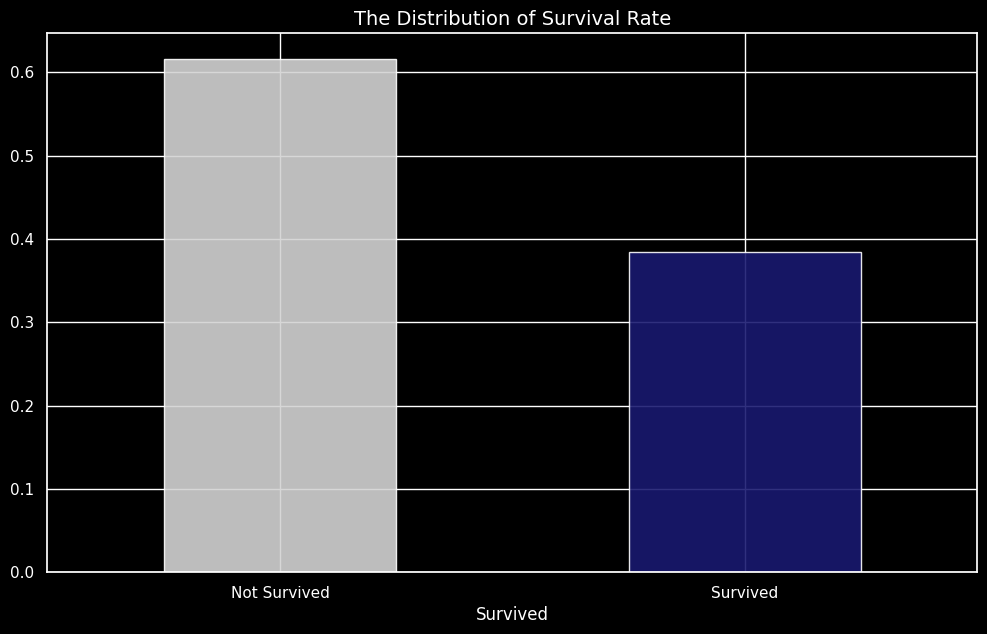

In [66]:
fig = plt.figure(figsize = (12,7))
grp.plot(kind='bar', color= ['lightgrey','midnightblue'], alpha = 0.9, rot=0)
plt.title('The Distribution of Survival Rate', fontsize=14)
plt.show()

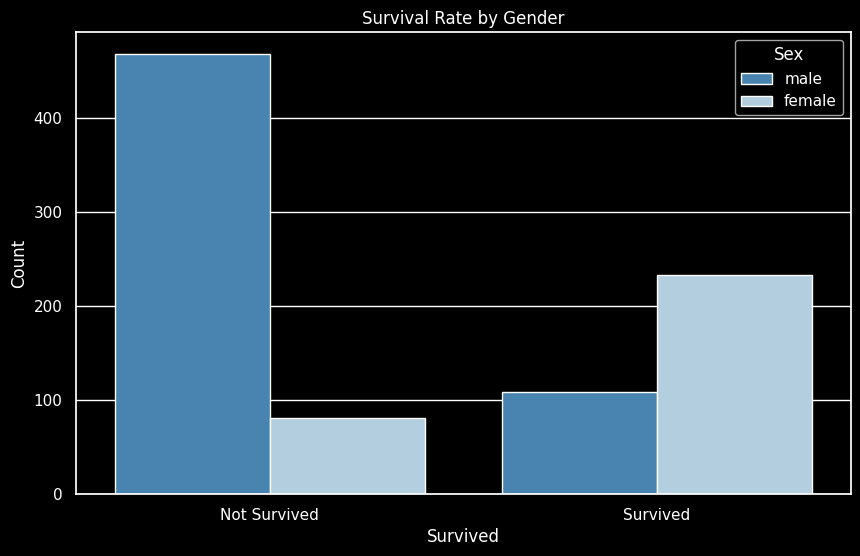

In [67]:
# Set dark theme
sns.set(style='darkgrid')
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=train, palette='Blues_r')
plt.title('Survival Rate by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

In [68]:

survival_by_gender = train.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
survival_by_gender.columns = ['Not Survived', 'Survived']
survival_by_gender


,Not Survived,Survived
Sex,,
female,81,233
male,468,109


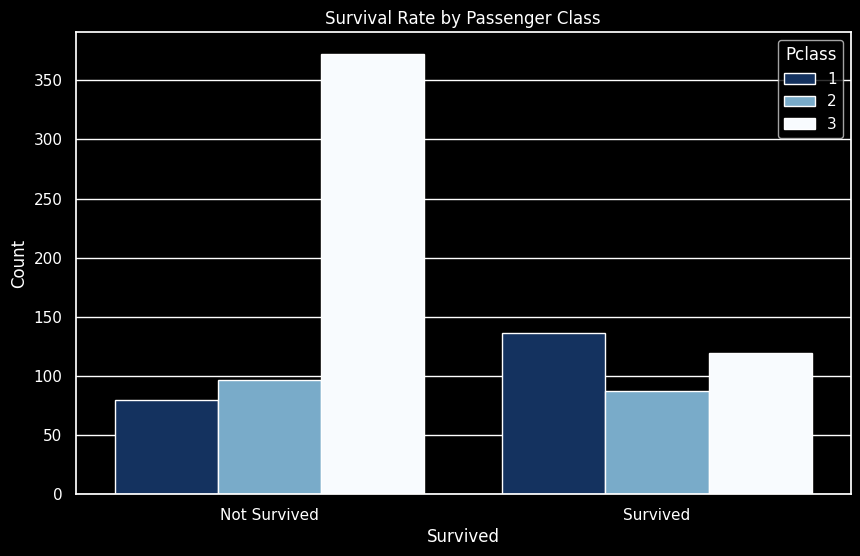

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=train, palette='Blues_r')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

In [70]:
survival_by_class = train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
survival_by_class.columns = ['Not Survived', 'Survived']
survival_by_class

,Not Survived,Survived
Pclass,,
1,80,136
2,97,87
3,372,119


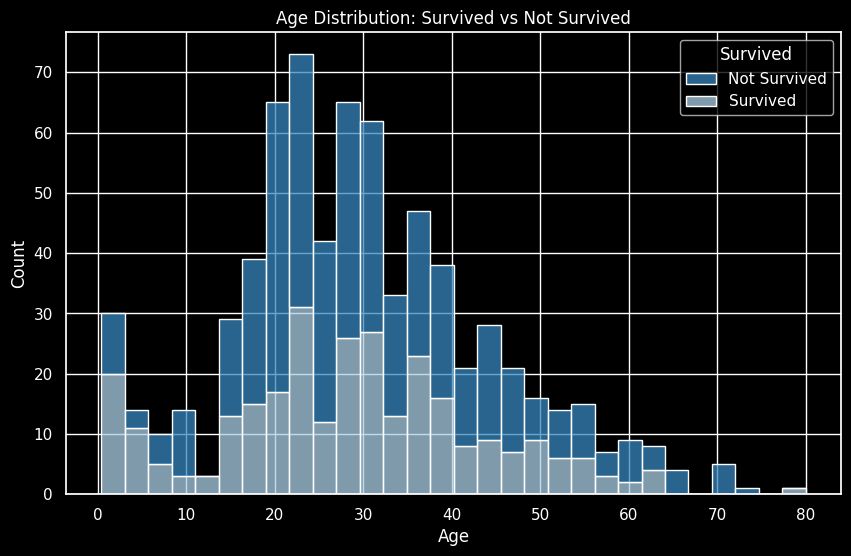

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', palette='Blues_r', bins=30)
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [72]:
bins = [0, 12, 18, 25, 35, 60, 120]
labels = ['0-12', '13-18', '19-25', '26-35', '36-60', '61+']

# Create a new column 'AgeGroup'
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and 'Survived' to get the count
age_distribution = train.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Rename columns for better understanding
age_distribution.columns = ['Not Survived', 'Survived']
age_distribution

,Not Survived,Survived
AgeGroup,,
0-12,29,39
13-18,23,22
19-25,108,57
26-35,123,78
36-60,122,87
61+,19,7


<Figure size 1200x800 with 0 Axes>

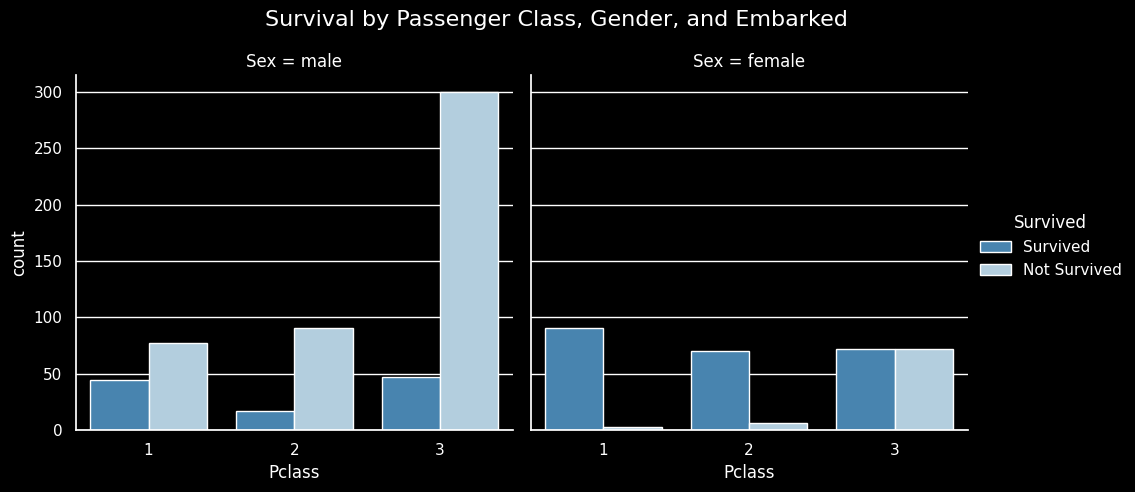

In [73]:
# Multivariate visualization: Survival by Passenger Class, Gender, and Embarked
plt.figure(figsize=(12, 8))
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=train, palette='Blues_r', dodge=True)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Passenger Class, Gender, and Embarked', fontsize=16)
plt.show()

## Data Cleaning and Preprocessing

#### Detecting Missing Value

In [74]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
print('Missing values:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values: True


,index,Total Null Values,Percentage
0,Cabin,687,77.104377
1,Age,177,19.865320
2,Embarked,2,0.224467
3,PassengerId,0,0.000000
4,Survived,0,0.000000
5,Pclass,0,0.000000
6,Name,0,0.000000
7,Sex,0,0.000000
8,SibSp,0,0.000000
9,Parch,0,0.000000


In [76]:
# Drop the 'Cabin' column
df_train.drop(columns=['Cabin'], inplace=True)

In [77]:
# Impute missing values in the 'Age' column with the mean age
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)

In [78]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

In [81]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [82]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [83]:
df_test.drop(columns=['Cabin'], inplace=True)

In [84]:
# Impute missing values in the 'Age' column with the mean age from the training dataset
df_test['Age'].fillna(mean_age, inplace=True)

# Impute missing values in the 'Fare' column with the mean fare
mean_fare = df_test['Fare'].mean()
df_test['Fare'].fillna(mean_fare, inplace=True)

In [85]:
# Encoding Categorical Variables: Convert 'Sex' to numerical values
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

# Encoding Categorical Variables: Apply one-hot encoding to the 'Embarked' column
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

In [86]:
print(df_test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [87]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,True


## Modeling

In [88]:
# Prepare the data
X = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(712, 8) (179, 8)


In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Logistic Regression

In [90]:
# Train the Logistic Regression model
log_model = LogisticRegression(max_iter=200).fit(X_train_scaled, y_train)
print(log_model)

LogisticRegression(max_iter=200)


In [91]:
# Predict on training data
y_train_pred_log = log_model.predict(X_train_scaled)

# Print classification report for training data
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



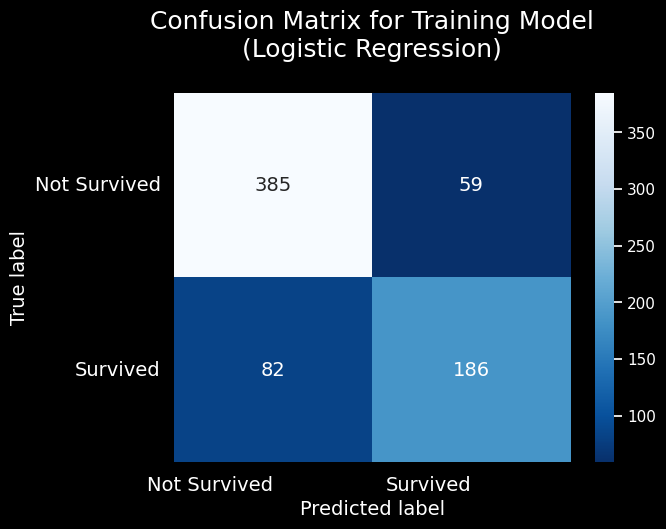

In [92]:
# Form confusion matrix for training data
confusion_matrix_log_train = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)),
                                          ('Not Survived', 'Survived'),
                                          ('Not Survived', 'Survived'))

# Plot confusion matrix for training data
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log_train, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='white')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [93]:
# Predict on test data
y_test_pred_log = log_model.predict(X_test_scaled)

# Print classification report for test data
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



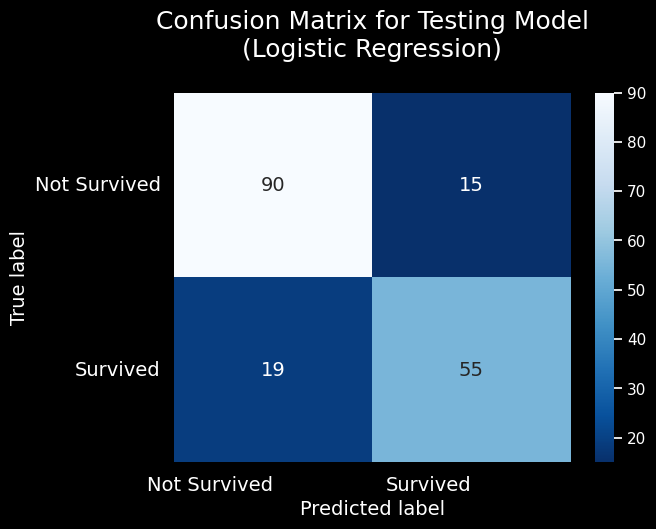

In [94]:
# Form confusion matrix for test data
confusion_matrix_log_test = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)),
                                         ('Not Survived', 'Survived'),
                                         ('Not Survived', 'Survived'))

# Plot confusion matrix for test data
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log_test, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='white')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [95]:
# Accuracy scores
acc_log_train = round(log_model.score(X_train_scaled, y_train) * 100, 2)
acc_log_test = round(log_model.score(X_test_scaled, y_test) * 100, 2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 80.2
Test Accuracy: % 81.01
